# __Simple Correlation and Linear Regression__

## Using one independent variable to predict the dependent variable

* Predicting how a **restaurant bill** relates to **server tips**.
* First using the linear model of the **scikit-learn** module.
* Then with the **statsmodel** module and Ordinary Least Squares (**OLS**).
      
    


#### Import of pandas, seaborn, and sklearn from linear_model

In [10]:
import pandas as pd
import seaborn as sns 
from sklearn import linear_model

#### Load the "tips" dataset

In [11]:
tips = sns.load_dataset('tips')

#### Tips dataset information:

In [12]:
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


#### Number of rows and columns in "tips" dataset:

In [13]:
print(tips.shape)

(244, 7)


#### Head and Tail ends of "tips" dataset:

In [14]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


#### First 5 rows (head) of "tips" dataset:

In [15]:
print(tips.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


#### Last 5 rows (tail) of "tips" dataset:

In [16]:
print(tips.tail())

     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


#### Independent variable "total_bill" added as "x":

In [17]:
X = tips['total_bill'].values.reshape(-1,1)

#### Dependent variable "tip" added as "y":

In [18]:
y=tips['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [19]:
# Find Pearson Correlation Coefficient (r)
r = tips.corr(method = 'pearson')
r

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### Pearson Correlation Coefficient as (r) defined:
* ± 0.50 < r > ± 1 indicates a strong correlation

In [20]:
r=tips.corr(method='pearson')
print(r)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


#### 
0.675734 shows strong correlation between the bill and the tip so, we proceed with linear regression. 
#### Linear regression model of sklearn added as "lr": 

In [21]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr=linear_model.LinearRegression()

In [ ]:
## Regression line equation is **y = mx + b**, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

#### Linear regression equation added to fit data as "predicted":

In [29]:
predicted = lr.fit(X,y)
m = predicted.coef_
b = predicted.intercept_

In [23]:
#predicted=lr.fit(X,y)

In [30]:
print(f'Slope of regression line is {m}')
print(f'The y-intercept is {b}')
print(f'The regression line equation is y = {m}x + {b}')

Slope of regression line is [0.10502452]
The y-intercept is 0.920269613554674
The regression line equation is y = [0.10502452]x + 0.920269613554674


#### Regression line from the results of fit():

In [25]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope of regression line is{m}')
print(f'The Y-intercept is {b}')
print(f'The regression line equation is : y = {m}x + {b}')

The slope of regression line is[0.10502452]
The Y-intercept is 0.920269613554674
The regression line equation is : y = [0.10502452]x + 0.920269613554674


#### Regression line scatterplot:

NameError: name 'tip' is not defined

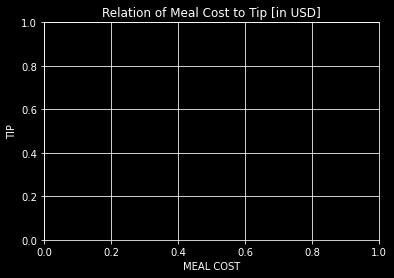

In [26]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.grid(True)
plt.title('Relation of Meal Cost to Tip [in USD]')
plt.xlabel('MEAL COST')
plt.ylabel("TIP")
plt.scatter(X,y,s = tip * 2.5,  c = "red", alpha = 0.8)
plt.plot(X, m * X + b)
plt.show()

#### Predicted tip for a $50.00 meal:

In [27]:
meal = 50.00
tip = 0.105025 * meal + 0.920270
print(f'The predicted tip for a ${meal: .2f} meal is ${tip:.2f}')

The predicted tip for a $ 50.00 meal is $6.17


#### Statsmodel module:
* using **Ordinary Least Squares** (**OLS**).

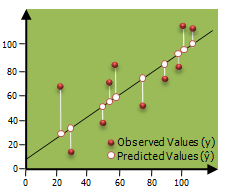

#### Import statsmodels API formual as "smf":

In [ ]:
import statsmodels.formula.api as smf

#### Load "tips" dataset as "tips":

In [ ]:
tips = sns.load_dataset('tips')

*
*
*
The **OLS** method computes the least squares values.
The response variable is left of the tilde and the
predictor is to the right of the tilde.


In [ ]:
model = smf.ols(formula = 'tip ~ total_bill',data = tips)

#### Fit the data as "results"

In [ ]:
results = model.fit()

#### Summary:

In [ ]:
print(results.summary())

#### Scatterplot of correlation between tip and total bill:

In [ ]:
plt.style.use('dark_background')
sns.lmplot(x='total_bill',y='tip',data=tips)
sns.color_palette("Spectral", as_cmap=True)
sns.set(font_scale=1.25)
plt.xlabel('TOTAL BILL')
plt.ylabel('TIP')
plt.title('CORRELATION: TOTAL BILL TO TIP [in USD]')

*
*
*
The params attribute yields the details for the equation of the regression line.

In [ ]:
print(results.params)

#### Predicted tip for a $50.00 meal using params attribute values:

In [ ]:
meal = 50.00
tip = 0.105025 * meal + 0.920270
print(f'The predicted tip for a ${meal:.2f} meal is ${tip:.2f}')

#### Predicted tip for a $100.00 meal using params attribute values:

In [ ]:
meal = 100.00
tip = 0.105025 * meal + 0.920270
print(f'The predicted tip for a ${meal:.2f} meal is ${tip:.2f}')